Current working directory: /home/ubuntu/project/mayang/LOGER/core
['/home/ubuntu/project/mayang/LOGER/core', '/home/ubuntu/anaconda3/envs/test/lib/python38.zip', '/home/ubuntu/anaconda3/envs/test/lib/python3.8', '/home/ubuntu/anaconda3/envs/test/lib/python3.8/lib-dynload', '', '/home/ubuntu/.local/lib/python3.8/site-packages', '/home/ubuntu/anaconda3/envs/test/lib/python3.8/site-packages', '/home/ubuntu/anaconda3/envs/test/lib/python3.8/site-packages/setuptools/_vendor']
Current working directory: /home/ubuntu/project/mayang/LOGER
['/home/ubuntu/project/mayang/LOGER/core', '/home/ubuntu/anaconda3/envs/test/lib/python38.zip', '/home/ubuntu/anaconda3/envs/test/lib/python3.8', '/home/ubuntu/anaconda3/envs/test/lib/python3.8/lib-dynload', '', '/home/ubuntu/.local/lib/python3.8/site-packages', '/home/ubuntu/anaconda3/envs/test/lib/python3.8/site-packages', '/home/ubuntu/anaconda3/envs/test/lib/python3.8/site-packages/setuptools/_vendor']
/home/ubuntu/project/mayang/LOGER
{'dbname': 'indexse

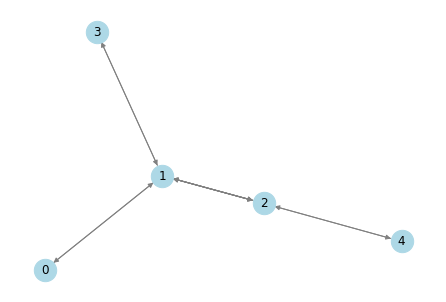

finish
[(0, {}), (1, {}), (2, {}), (3, {}), (4, {})]


In [1]:
from sql import Sql,_global
import networkx as nx
import matplotlib.pyplot as plt
from core import database, Sql, Plan, load
import os
print(os.getcwd())
if __name__ == "__main__":
    # print(1)
    database.setup(dbname='indexselection_tpcds___1', user='postgres', password='password', host='127.0.0.1', port='5432', cache=False)
    # 创建SQL实例
    sql_query = """
select  
   s_store_name
  ,s_company_id
  ,s_street_number
  ,s_street_name
  ,s_street_type
  ,s_suite_number
  ,s_city
  ,s_county
  ,s_state
  ,s_zip
  ,sum(case when (sr_returned_date_sk - ss_sold_date_sk <= 30 ) then 1 else 0 end)  as "30 days" 
  ,sum(case when (sr_returned_date_sk - ss_sold_date_sk > 30) and 
                 (sr_returned_date_sk - ss_sold_date_sk <= 60) then 1 else 0 end )  as "31-60 days" 
  ,sum(case when (sr_returned_date_sk - ss_sold_date_sk > 60) and 
                 (sr_returned_date_sk - ss_sold_date_sk <= 90) then 1 else 0 end)  as "61-90 days" 
  ,sum(case when (sr_returned_date_sk - ss_sold_date_sk > 90) and
                 (sr_returned_date_sk - ss_sold_date_sk <= 120) then 1 else 0 end)  as "91-120 days" 
  ,sum(case when (sr_returned_date_sk - ss_sold_date_sk  > 120) then 1 else 0 end)  as ">120 days" 
from
   store_sales
  ,store_returns
  ,store
  ,date_dim d1
  ,date_dim d2
where
    d2.d_year = 1998
and d2.d_moy  = 10
and ss_ticket_number = sr_ticket_number
and ss_item_sk = sr_item_sk
and ss_sold_date_sk   = d1.d_date_sk
and sr_returned_date_sk   = d2.d_date_sk
and ss_customer_sk = sr_customer_sk
and ss_store_sk = s_store_sk
group by
   s_store_name
  ,s_company_id
  ,s_street_number
  ,s_street_name
  ,s_street_type
  ,s_suite_number
  ,s_city
  ,s_county
  ,s_state
  ,s_zip
order by s_store_name
        ,s_company_id
        ,s_street_number
        ,s_street_name
        ,s_street_type
        ,s_suite_number
        ,s_city
        ,s_county
        ,s_state
        ,s_zip
limit 100"""
    sql_instance = Sql(sql_query)

    # 构建异构图
    g, data_dict, node_indexes,edge_list = sql_instance.to_hetero_graph_dgl()

    print('edge_list:',edge_list)
    # 打印图特征表示
    print("Graph Nodes:", g.nodes())
    print("Graph Edges:", g.edges())
    print("Node Features:", g.ndata)
    print("Edge Features:", g.edata)

    # 打印数据字典和节点索引
    print("Data Dictionary:", data_dict)
    print("Node Indexes:", node_indexes)

    nx_graph = g.to_networkx()

    # 使用 spring 布局绘制图形
    pos = nx.spring_layout(nx_graph)
    nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
    plt.savefig('./graph_output.png', format='png', dpi=300)
    plt.show()
    print('finish')
    print(nx_graph.nodes(data=True))

In [11]:
str(edge_list[0][2])

'store_sales.ss_ticket_number = store_returns.sr_ticket_number'

In [2]:
"_47_dakdnkl".split('_47_')

['', 'dakdnkl']